## Import dependencies

In [102]:
import matplotlib.pyplot as plt
import neurokit2 as nk
from peakdet import Physio, operations

## Create dummy ECG data

### What ECG signal should look like ?

In [125]:
clean_ecg = nk.ecg_simulate(duration=2, noise=0, heart_rate=70, random_state=0)
clean_ecg = clean_ecg[500:1500]

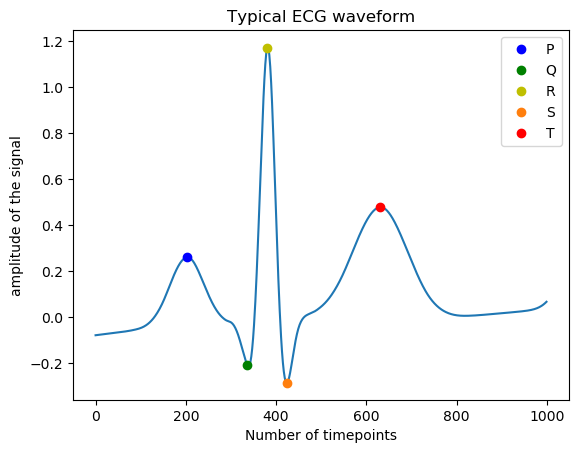

In [126]:
plt.plot(clean_ecg)
plt.plot(203, clean_ecg[203], 'bo', label='P')
plt.plot(336, clean_ecg[336], 'go', label='Q')
plt.plot(380, clean_ecg[380], 'yo', label='R')
plt.plot(424, clean_ecg[424], 'o', label='S')
plt.plot(630, clean_ecg[630], 'ro', label='T')
plt.title("Typical ECG waveform")
plt.xlabel("Number of timepoints")
plt.ylabel("amplitude of the signal")
plt.legend()

### Add some noise

In [127]:
dummy_ecg = nk.ecg_simulate(duration=60*3, noise=0.5)

## Visualize the signal

Text(0.5, 0, 'Number of timepoints')

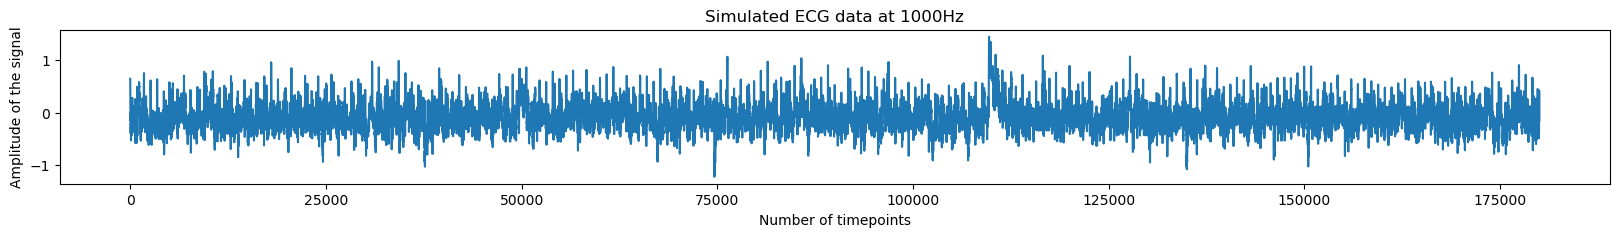

In [128]:
plt.figure(figsize=(20, 2))
plt.plot(dummy_ecg)
plt.title('Simulated ECG data at 1000Hz')
plt.ylabel('Amplitude of the signal')
plt.xlabel('Number of timepoints')

Text(0.5, 0, 'Number of timepoints')

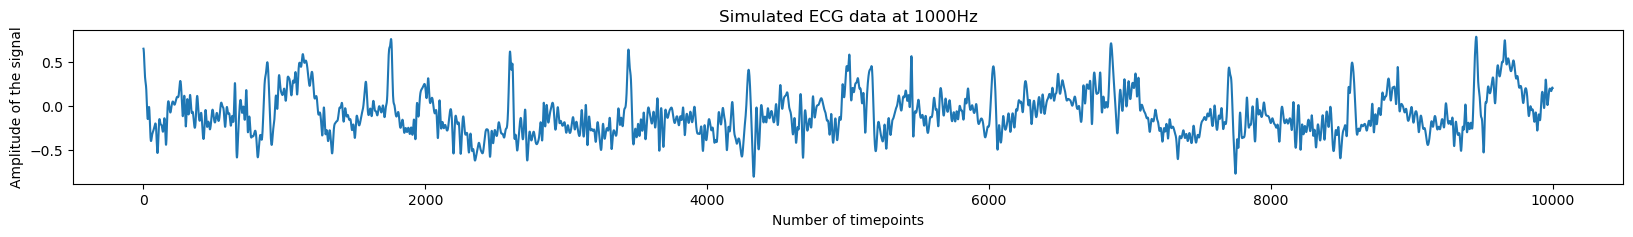

In [129]:
plt.figure(figsize=(20, 2))
plt.plot(dummy_ecg[:10*1000])
plt.title('Simulated ECG data at 1000Hz')
plt.ylabel('Amplitude of the signal')
plt.xlabel('Number of timepoints')

## Create a Physio object

In [130]:
phys_ecg = Physio(dummy_ecg, fs=1000)
print(phys_ecg)

Physio(size=180000, fs=1000.0)


## Let's try to clean our signal

In [131]:
phys_ecg = operations.filter_physio(phys_ecg, cutoffs=[0.5, 35], method='bandpass')
print(phys_ecg.history)

[('filter_physio', {'cutoffs': [0.5, 35], 'method': 'bandpass'})]


Text(0.5, 0, 'Number of timepoints')

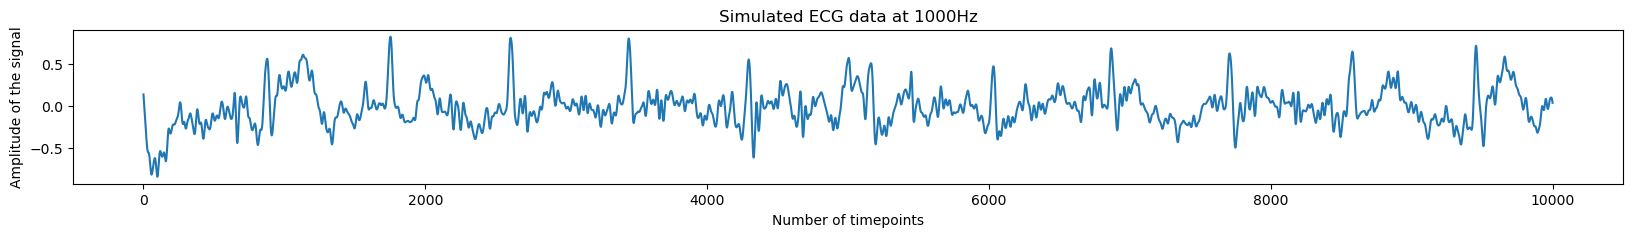

In [132]:
plt.figure(figsize=(20, 2))
plt.plot(phys_ecg.data[:10*1000])
plt.title('Simulated ECG data at 1000Hz')
plt.ylabel('Amplitude of the signal')
plt.xlabel('Number of timepoints')

In [133]:
phys_ecg = operations.peakfind_physio(phys_ecg)

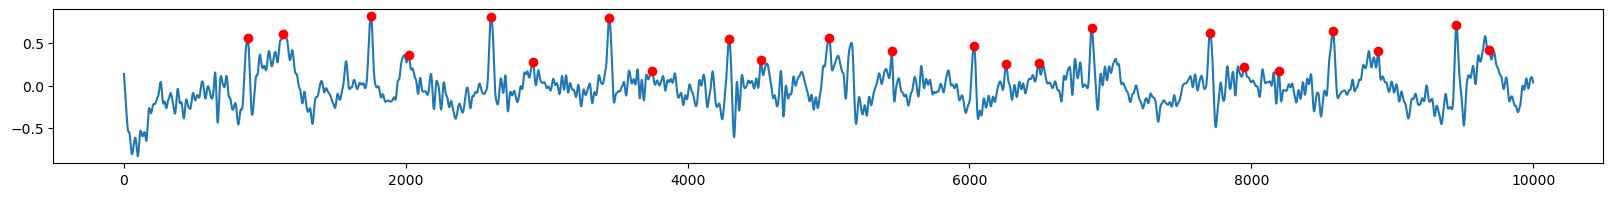

In [134]:
plt.figure(figsize=(20, 2))
plt.plot(phys_ecg.data[:10*1000])
peaks_idx = phys_ecg.peaks[phys_ecg.peaks<10*1000]
plt.plot(peaks_idx, phys_ecg.data[peaks_idx], 'ro')

In [135]:
peaks_idx.shape

(23,)

<div class="alert alert-block alert-info">
<b>Wait... Does that make sense ?</b>
<br>We have more than 20 peaks for 10 secondes, which means that we have an heart rate above 120 bpm ! Although not physiologically impossible, it is not what we should expect. Indeed, when we created our simulated signals, we have specified a desired heart rate of 70 bpm...
</div>

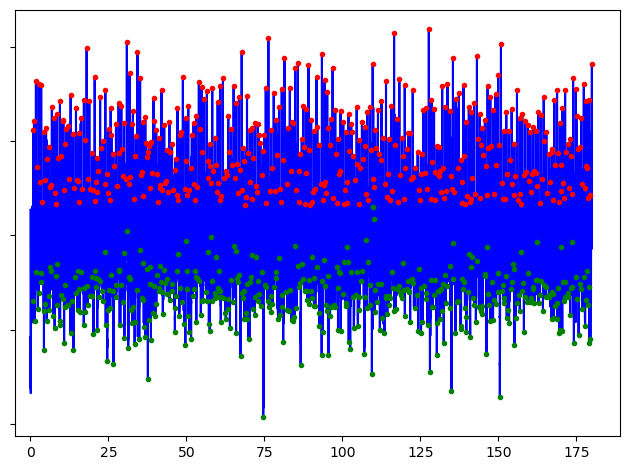

In [137]:
# Does not work in jupyter notebook
phys_ecg = operations.edit_physio(phys_ecg)